#### Business Problem:

* Shopee is the leading e-commerce platform in Southeast Asia and Taiwan. The company provides strong payment and logistical support along with a 'Lowest Price Guaranteed' feature on thousands of Shopee's listed products.
* Many retail companies use a variety of methods to assure customers that their products are the cheapest. Among them is product matching, which allows a company to offer products at rates that are competitive to the same product sold by another retailer.
* Two different images of similar items may represent the same product or two completely different items. Retailers want to avoid misrepresentations and other issues that could come from conflating two dissimilar products.
* Using item’s information and image, we need to apply machine learning or deep learning techniques to perform product matching overcoming the above issue.


### Metric:

* The evaluation metric used in this competition is the mean F1 score.

* F1 score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric. F1-score is used when the False Negatives and False Positives are crucial.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from IPython.display import Image
import math
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train.csv')

In [3]:
df.head(2)

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


There are 34250 postings we given for the training data.

# * Features in the Dataset:

* posting_id - ID for the posting.
* image - ID for the image.
* image_phash - Perceptual Hash code of the Image
* title - Product description of the posting
* label_group - ID code for all postings that map to the same product.

## * posting_id:

In [5]:
len(np.unique(df['posting_id']))

34250

Above analysis shows that there are no duplicate entries are present (i.e.) each posting has unique ID.

## * image:

Reference: https://www.tecmint.com/generate-verify-check-files-md5-checksum-linux/

* This feature has name of the posting's image (i.e.) product image.
* Name of the image is genearted using md5sum.
* md5sum (Message Digest 5):
    * MD5 Sums are 128-bit character strings (alphanumeric).
    * MD5 Sums is generated using MD5 algorithm.
    * It generates 128-bit hexadecimal hash value .
    * So each hash value (image name) have 32 characters (128/4 = 32) (1 digit has 4 bit).
    * When MD5 generate one for a particular file, it is precisely unchanged on any machine no matter the number of times it is generated.

In [6]:
len(np.unique(df['image']))

32412

1838 images are duplicate (i.e.) similar image. 

In [7]:
keys = np.unique(df['image'], return_counts=True)[0]
values = np.unique(df['image'], return_counts=True)[1]

similar_image_count = {keys[i]: values[i] for i in range(len(keys))}

In [8]:
stats.describe(values)

DescribeResult(nobs=32412, minmax=(1, 15), mean=1.0567073923238306, variance=0.12865298241056428, skewness=11.666699873978882, kurtosis=224.29103292021165)

In [9]:
no_matchs = {keys[i]: values[i] for i in range(len(keys)) if values[i] <= 1}

In [10]:
len(no_matchs)

31166

In [11]:
((31166) / 34250) * 100

90.9956204379562

* Maximum number of similarity count is 15.
* 90% of postings have no similar postings.

In [12]:
sorted(list(set(similar_image_count.values())), reverse=True)

[15, 13, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [13]:
# Removing images which has no matching and has only one match

up_similar_image_count = {}
for i in similar_image_count:
    if similar_image_count[i] > 2:
        up_similar_image_count[i] = similar_image_count[i]

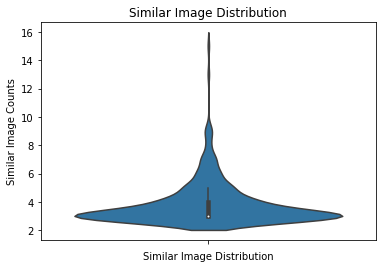

In [14]:
sns.violinplot(y=list(up_similar_image_count.values())).set_title('Similar Image Distribution')
plt.xlabel('Similar Image Distribution')
plt.ylabel('Similar Image Counts')
plt.show()

In [15]:
# Retriving image with highest similar counts for further analysis.

top_similar_image_count = {}
for i in up_similar_image_count:
    if up_similar_image_count[i] == 15:
        top_similar_image_count[i] = up_similar_image_count[i]

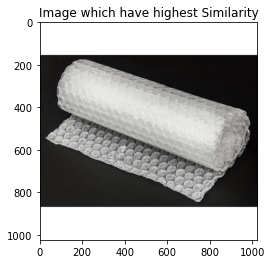

In [16]:
img = mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/0cca4afba97e106abd0843ce72881ca4.jpg')
imgplot = plt.imshow(img)
plt.title('Image which have highest Similarity')
plt.show()

In [17]:
df.loc[df['image'] == '0cca4afba97e106abd0843ce72881ca4.jpg', :]

posting_id                                 image  \
1651  train_3068759534  0cca4afba97e106abd0843ce72881ca4.jpg   
1652  train_1049463374  0cca4afba97e106abd0843ce72881ca4.jpg   
1653  train_2420615645  0cca4afba97e106abd0843ce72881ca4.jpg   
1654  train_1236710293  0cca4afba97e106abd0843ce72881ca4.jpg   
1655   train_443869273  0cca4afba97e106abd0843ce72881ca4.jpg   
1656  train_1381575164  0cca4afba97e106abd0843ce72881ca4.jpg   
1657  train_2085280992  0cca4afba97e106abd0843ce72881ca4.jpg   
1658  train_4226152332  0cca4afba97e106abd0843ce72881ca4.jpg   
1659  train_1437764574  0cca4afba97e106abd0843ce72881ca4.jpg   
1660  train_3993385953  0cca4afba97e106abd0843ce72881ca4.jpg   
1661   train_493140267  0cca4afba97e106abd0843ce72881ca4.jpg   
1662   train_419018435  0cca4afba97e106abd0843ce72881ca4.jpg   
1663  train_2514153495  0cca4afba97e106abd0843ce72881ca4.jpg   
1664  train_2951822530  0cca4afba97e106abd0843ce72881ca4.jpg   
1665   train_584097694  0cca4afba97e106abd0843ce72881ca4.jpg   

           image_phash                                              title  \
1651  d0c0ea37bd9acce0  BUBBLE PACK UNTUK PACKING TAMBAHAN 1BUBBLE UNT...   
1652  d0c0ea37bd9acce0                                        BUBBLE WARP   
1653  d0c0ea37bd9acce0      BUBBLE WRAP - EXTRA PACKING UNTUK BARANG ANDA   
1654  d0c0ea37bd9acce0                    Bubble Warp Pengaman Pengiriman   
1655  d0c0ea37bd9acce0                                        Bubble Wrap   
1656  d0c0ea37bd9acce0                 Bubble Wrap untuk ekstra packaging   
1657  d0c0ea37bd9acce0                                         Buble Wrap   
1658  d0c0ea37bd9acce0                    EXTRA BUBBLE WRAP UNTUK PACKING   
1659  d0c0ea37bd9acce0                                  Extra Bubble Wrap   
1660  d0c0ea37bd9acce0               Extra Bubble Wrap Pengaman Packingan   
1661  d0c0ea37bd9acce0                       PACKING TAMBAHAN BUBBLE WRAP   
1662  d0c0ea37bd9acce0                               Tambahan Bubble Wrap   
1663  d0c0ea37bd9acce0  Tambahan Bubble wrap / Plastik Bubble Pelindun...   
1664  d0c0ea37bd9acce0      Tambahan Extra Bubble Wrap Pengaman Packingan   
1665  d0c0ea37bd9acce0                           bubble wrap - BUBLE WRAP   

      label_group  
1651   4198148727  
1652   2403374241  
1653   4198148727  
1654   4198148727  
1655   4198148727  
1656   4198148727  
1657   4198148727  
1658   2403374241  
1659   4198148727  
1660   2403374241  
1661   4198148727  
1662   4198148727  
1663   4198148727  
1664   4198148727  
1665   4198148727

In [18]:
df.loc[df['image'] == '0cca4afba97e106abd0843ce72881ca4.jpg'].groupby(['label_group']).count()

posting_id  image  image_phash  title
label_group                                       
2403374241            3      3            3      3
4198148727           12     12           12     12

In [19]:
top_similar_image_count = {}
for i in up_similar_image_count:
    if up_similar_image_count[i] == 13:
        top_similar_image_count[i] = up_similar_image_count[i]
top_similar_image_count

{'c739a327dbeca472089a5195e898cce4.jpg': 13}

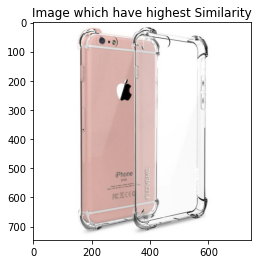

In [20]:
img = mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/c739a327dbeca472089a5195e898cce4.jpg')
imgplot = plt.imshow(img)
plt.title('Image which have highest Similarity')
plt.show()

In [21]:
df.loc[df['image'] == 'c739a327dbeca472089a5195e898cce4.jpg'].groupby(['label_group']).count()

posting_id  image  image_phash  title
label_group                                       
3717044186           13     13           13     13

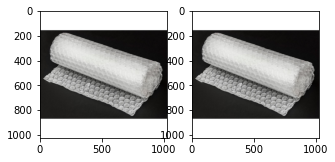

In [22]:
img_count = 0
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

# label_group: 4198148727
axs[0].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/0cca4afba97e106abd0843ce72881ca4.jpg'))

# label_group: 2403374241
axs[1].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/0cca4afba97e106abd0843ce72881ca4.jpg'))
plt.show()

In [23]:
df.loc[(df['label_group'] == 4198148727) & (df['image'] == '0cca4afba97e106abd0843ce72881ca4.jpg')][:2]

posting_id                                 image  \
1651  train_3068759534  0cca4afba97e106abd0843ce72881ca4.jpg   
1653  train_2420615645  0cca4afba97e106abd0843ce72881ca4.jpg   

           image_phash                                              title  \
1651  d0c0ea37bd9acce0  BUBBLE PACK UNTUK PACKING TAMBAHAN 1BUBBLE UNT...   
1653  d0c0ea37bd9acce0      BUBBLE WRAP - EXTRA PACKING UNTUK BARANG ANDA   

      label_group  
1651   4198148727  
1653   4198148727

In [24]:
df.loc[(df['label_group'] == 2403374241) & (df['image'] == '0cca4afba97e106abd0843ce72881ca4.jpg')][:2]

posting_id                                 image  \
1652  train_1049463374  0cca4afba97e106abd0843ce72881ca4.jpg   
1658  train_4226152332  0cca4afba97e106abd0843ce72881ca4.jpg   

           image_phash                            title  label_group  
1652  d0c0ea37bd9acce0                      BUBBLE WARP   2403374241  
1658  d0c0ea37bd9acce0  EXTRA BUBBLE WRAP UNTUK PACKING   2403374241

* Above analysis shows,
    * This similar product might have same image_phash.
    * But product (0cca4afba97e106abd0843ce72881ca4.jpg) have 2 label_groups:
        * 4198148727
        * 2403374241
    * This shows that even though it has same image_phash similar product can have more than one label_group based on title as well.
    * Title of similar product need not to be same.

In [25]:
temp = df.groupby('image')
temp = temp.agg({"label_group": "nunique"})
len(temp.loc[temp['label_group'] > 1])

46

In [26]:
(46/len(df)) * 100

0.1343065693430657

Only 0.13% of same products with same name, image_phash belongs to different label_groups.

## * image_phash:

##### Reference : 
##### * https://en.wikipedia.org/wiki/Perceptual_hashing
##### * https://www.kaggle.com/franckepeixoto/phash-determine-whether-2-images-are-equal-or-not
##### * https://www.tutorialspoint.com/what-is-hamming-distance#:~:text=Hamming%20distance%20is%20a%20metric,d(a%2Cb).

Perceptual hashing is the use of an algorithm that produces a snippet or fingerprint of various forms of multimedia.* Perceptual hashing is the use of an algorithm that produces a snippet or fingerprint of various forms of multimedia.

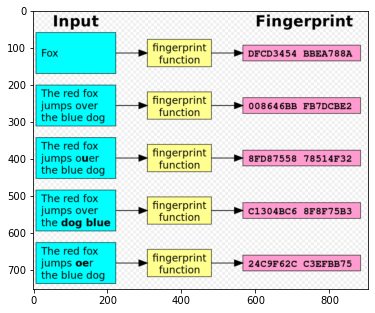

In [27]:
plt.figure(figsize=(6, 6))
img = mpimg.imread('C:/Users/Srikandan/Downloads/fingerprint-phash.png')
imgplot = plt.imshow(img)
plt.show()

* Above image shows that, if we sent any multimedia data to Perceptual Hashing alogrithm it generates hash value for it.
* This hash can be used to compare images by calculating the Hamming distance.
* Hamming distance:
    * Hamming distance is a metric for comparing two binary data strings.
    * While comparing two binary strings of equal length, Hamming distance is the number of bit positions in which the two bits are different.


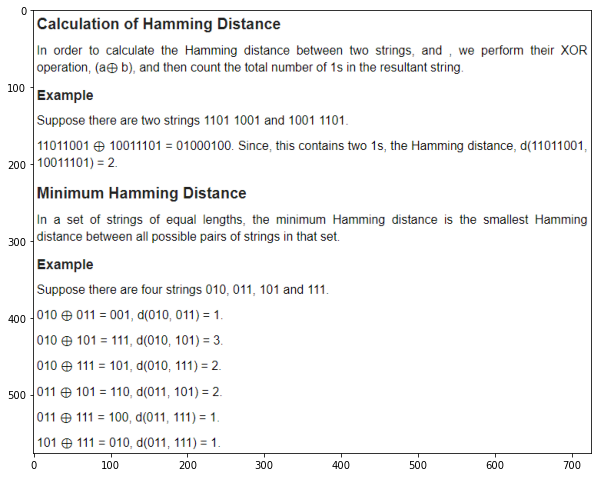

In [28]:
plt.figure(figsize=(10, 10))
img = mpimg.imread('C:/Users/Srikandan/Downloads/hamming.png')
imgplot = plt.imshow(img)
plt.show()

In [29]:
keys = np.unique(df['image_phash'], return_counts=True)[0]
values = np.unique(df['image_phash'], return_counts=True)[1]

similar_phash_count = {keys[i]: values[i] for i in range(len(keys)) if values[i] > 1}

In [30]:
len(similar_phash_count)

3229

In [31]:
sorted(list(set(similar_image_count.values())), reverse=True)

[15, 13, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [32]:
# First highest similar image phash

top_similar_phash_count = {}
for i in similar_phash_count:
    if similar_phash_count[i] == 26:
        top_similar_phash_count[i] = similar_phash_count[i]
print(top_similar_phash_count)

{'fad28daa2ad05595': 26}


In [33]:
df.loc[df['image_phash'] == list(top_similar_phash_count.keys())[0]].groupby(['label_group']).count()

posting_id  image  image_phash  title
label_group                                       
997220911            26     26           26     26

In [34]:
df.loc[df['image_phash'] == 'fad28daa2ad05595'].groupby(['image']).count()

posting_id  image_phash  title  \
image                                                                  
04a00bccb7f1560e755f5f1def73db59.jpg           1            1      1   
0f459b1e8aa89ee9e79b2ec95440e9c3.jpg           2            2      2   
1dbf735adb93d54e6340af02f9b5472e.jpg           2            2      2   
2cd540e8c1810d1d1aaf3d73b8116cdc.jpg           1            1      1   
43af52158ed9acd8274a7d6d6c109dfc.jpg           1            1      1   
50ef370271e8c7e00eaaf018c9cd93dd.jpg           1            1      1   
5c1e0f695fb5ab7b0d83de0fef4bfdaf.jpg           1            1      1   
8591ed8b5bc268e386a66206bb233b2f.jpg           1            1      1   
9ce299d95fb2a89ff4ecb207cb4f0fe6.jpg           1            1      1   
a75890cf09d9c9487ee3530d856ab456.jpg           1            1      1   
b6b351c0f1187f86689ec203859f86a7.jpg           1            1      1   
c13a9c475a18cc5b73c5003d10084e6d.jpg           1            1      1   
c791b68707f380c959c19569ff4746d2.jpg           1            1      1   
ccec47f17a3d740f9bdd9fe695a14b62.jpg           2            2      2   
cf718bef78980e0e8b250e7ce96a10ce.jpg           1            1      1   
dbdc85177d752dbbfd5b9e8b1dfe51bf.jpg           1            1      1   
e749e5b1ef5b1b2d74fa9bdcb37e7ba7.jpg           1            1      1   
f295135f60f6932599306d338c872efd.jpg           1            1      1   
f9dc2cf9ed811fec7cbc9d5120638f0c.jpg           5            5      5   

                                      label_group  
image                                              
04a00bccb7f1560e755f5f1def73db59.jpg            1  
0f459b1e8aa89ee9e79b2ec95440e9c3.jpg            2  
1dbf735adb93d54e6340af02f9b5472e.jpg            2  
2cd540e8c1810d1d1aaf3d73b8116cdc.jpg            1  
43af52158ed9acd8274a7d6d6c109dfc.jpg            1  
50ef370271e8c7e00eaaf018c9cd93dd.jpg            1  
5c1e0f695fb5ab7b0d83de0fef4bfdaf.jpg            1  
8591ed8b5bc268e386a66206bb233b2f.jpg            1  
9ce299d95fb2a89ff4ecb207cb4f0fe6.jpg            1  
a75890cf09d9c9487ee3530d856ab456.jpg            1  
b6b351c0f1187f86689ec203859f86a7.jpg            1  
c13a9c475a18cc5b73c5003d10084e6d.jpg            1  
c791b68707f380c959c19569ff4746d2.jpg            1  
ccec47f17a3d740f9bdd9fe695a14b62.jpg            2  
cf718bef78980e0e8b250e7ce96a10ce.jpg            1  
dbdc85177d752dbbfd5b9e8b1dfe51bf.jpg            1  
e749e5b1ef5b1b2d74fa9bdcb37e7ba7.jpg            1  
f295135f60f6932599306d338c872efd.jpg            1  
f9dc2cf9ed811fec7cbc9d5120638f0c.jpg            5

In [35]:
images = list(df.loc[df['image_phash'] == 'fad28daa2ad05595'].groupby(['image']).count().reset_index()['image'])
print(len(images))

19


Out of 26 postings Image Phash 'fad28daa2ad05595', there are 19 different images (i.e) image names were found.

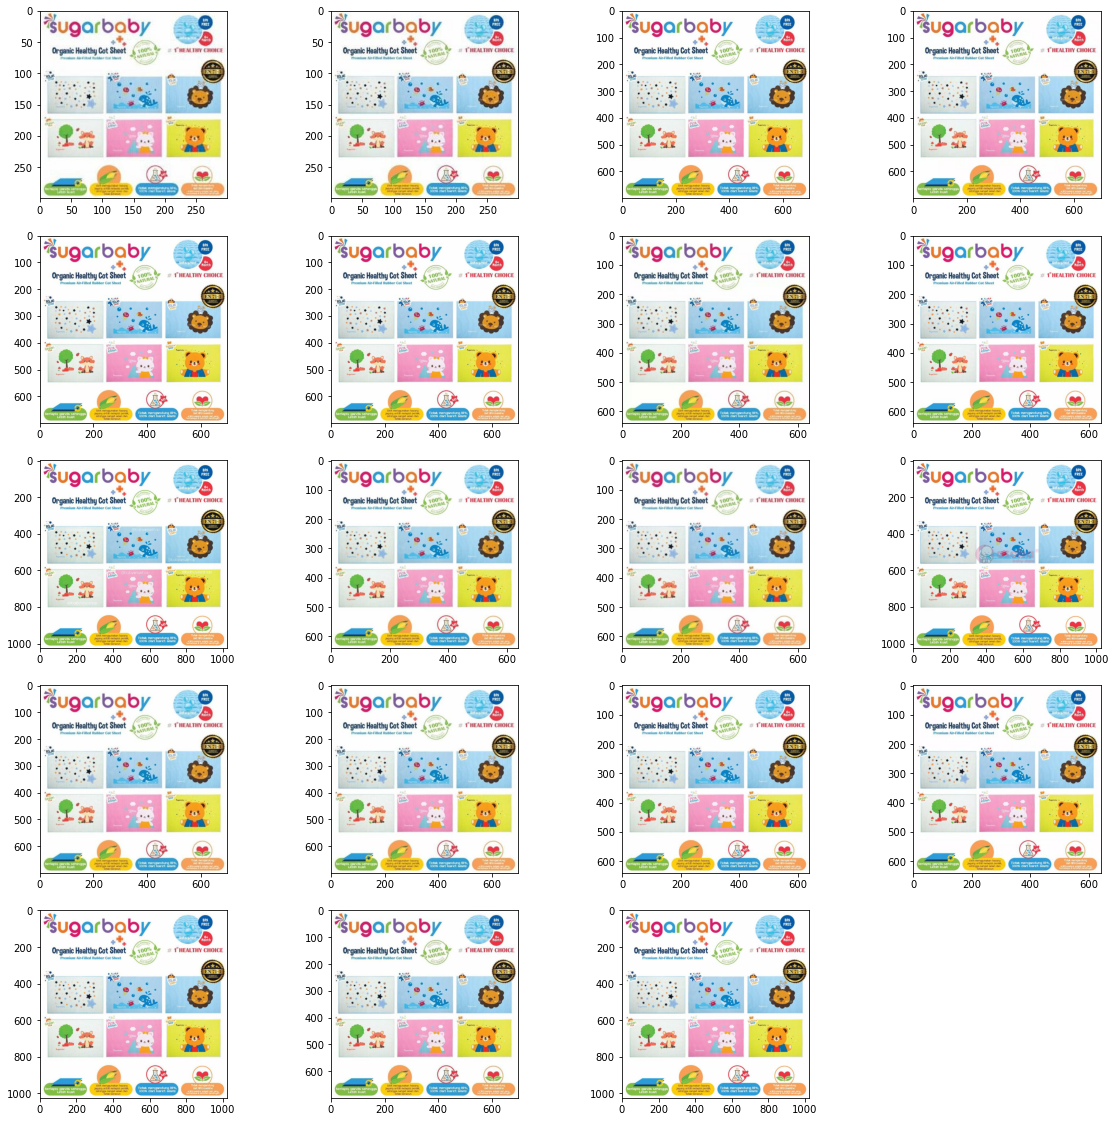

In [36]:
col_len = 4 
row_len = math.ceil(len(images) / 4)
img_count = 0
f, axs = plt.subplots(nrows=row_len, ncols=col_len, figsize=(20, 20))
for i in range(row_len):
    for j in range(col_len):
        if(img_count < len(images)):
            axs[i, j].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/' + images[img_count]))
            img_count+=1
        else:
            f.delaxes(axs[i][j])
plt.show()

These 19 images are similar images and hence same phash is present in all these images  but with different image names.

In [37]:
# Second highest similar image phash

top_similar_phash_count = {}
for i in similar_phash_count:
    if similar_phash_count[i] == 20:
        top_similar_phash_count[i] = similar_phash_count[i]
print(top_similar_phash_count)

{'d0c0ea37bd9acce0': 20}


In [38]:
df.loc[df['image_phash'] == list(top_similar_phash_count.keys())[0]].groupby(['label_group']).count()

posting_id  image  image_phash  title
label_group                                       
1960893869            1      1            1      1
2403374241            3      3            3      3
4198148727           16     16           16     16

In [39]:
df.loc[df['image_phash'] == 'd0c0ea37bd9acce0'].groupby(['image']).count()

posting_id  image_phash  title  \
image                                                                  
0cca4afba97e106abd0843ce72881ca4.jpg          15           15     15   
2a8c24726ee9a1446a65325d65f66659.jpg           1            1      1   
97579081385d8dd3bbee151ff0bf5cb1.jpg           3            3      3   
d3958ee57bd05fb4c6f8ed9a24fe0f73.jpg           1            1      1   

                                      label_group  
image                                              
0cca4afba97e106abd0843ce72881ca4.jpg           15  
2a8c24726ee9a1446a65325d65f66659.jpg            1  
97579081385d8dd3bbee151ff0bf5cb1.jpg            3  
d3958ee57bd05fb4c6f8ed9a24fe0f73.jpg            1

In [40]:
images = list(df.loc[df['image_phash'] == 'd0c0ea37bd9acce0'].groupby(['image']).count().reset_index()['image'])
print(len(images))

4


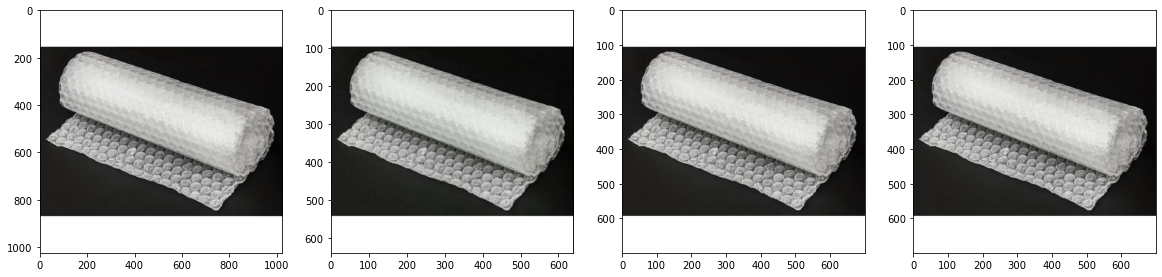

In [41]:
img_count = 0
f, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))
axs[0].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/0cca4afba97e106abd0843ce72881ca4.jpg'))
axs[1].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/2a8c24726ee9a1446a65325d65f66659.jpg'))
axs[2].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/97579081385d8dd3bbee151ff0bf5cb1.jpg'))
axs[3].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/d3958ee57bd05fb4c6f8ed9a24fe0f73.jpg'))
plt.show()

* When analysing second highest similar image_phash similar images are present but with,
    * different image names and
    * different label_groups

## * title:

In [42]:
df['title']

0                                Paper Bag Victoria Secret
1        Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...
2              Maling TTS Canned Pork Luncheon Meat 397 gr
3        Daster Batik Lengan pendek - Motif Acak / Camp...
4                        Nescafe \xc3\x89clair Latte 220ml
                               ...                        
34245    Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...
34246      MamyPoko Pants Royal Soft - S 70 - Popok Celana
34247    KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...
34248    Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...
34249    FLEX TAPE PELAPIS BOCOR / ISOLASI AJAIB / ANTI...
Name: title, Length: 34250, dtype: object

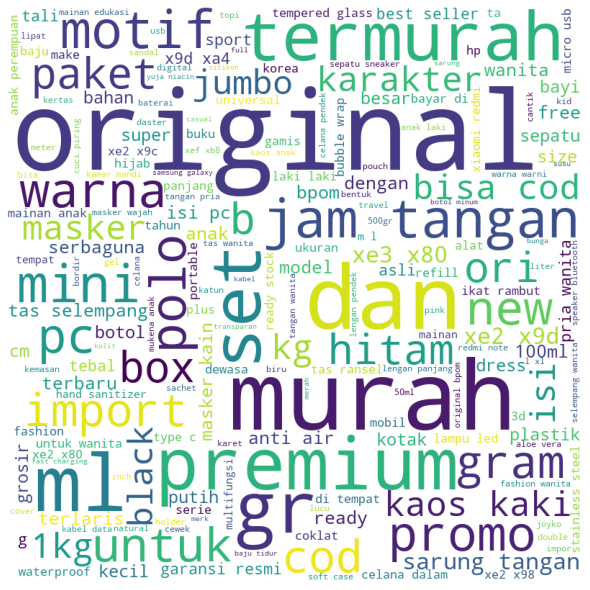

In [43]:
stopwords = set(STOPWORDS)

product_title = ' '.join(df['title'].str.lower())

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(product_title)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

* We can see from above word cloud, product information like,
    * Product type,
    * Product dimensions (size, color, etc,.),
    * Other descriptions of a product.

In [44]:
title_length = list(df['title'].str.split(' ').apply(lambda x : len(x)))
title_length[:5]

[4, 14, 8, 16, 4]

In [45]:
low_per = np.percentile(title_length, 25)
high_per = np.percentile(title_length, 75)

up_title = []
for i in title_length:
    if (i >= low_per and i <= high_per):
        up_title.append(i)

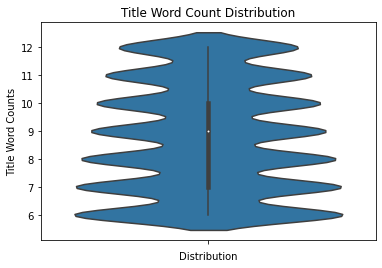

In [46]:
sns.violinplot(y=up_title).set_title('Title Word Count Distribution')
plt.xlabel('Distribution')
plt.ylabel('Title Word Counts')
plt.show()

In [47]:
print('Minimum word count is', min(title_length))
print('Maximum word count is', max(title_length))
print('Median word count is', np.median(title_length))
print('Mean word count is', np.mean(title_length))

Minimum word count is 1
Maximum word count is 61
Median word count is 9.0
Mean word count is 9.464671532846715


In [48]:
df.loc[df['title'].str.split(' ').str.len() >= 61]

posting_id                                 image  \
17755  train_414790116  858b430bce57437ff3623c54c31974fd.jpg   

            image_phash                                              title  \
17755  c978ab06fa56d22a  Silicone Case Premium Realme 7 7i 5i C15 C12 C...   

       label_group  
17755   2126962532

In [49]:
df.loc[df['image'] == '858b430bce57437ff3623c54c31974fd.jpg']

posting_id                                 image  \
17755   train_414790116  858b430bce57437ff3623c54c31974fd.jpg   
17756  train_3804349073  858b430bce57437ff3623c54c31974fd.jpg   
17757   train_824472973  858b430bce57437ff3623c54c31974fd.jpg   

            image_phash                                              title  \
17755  c978ab06fa56d22a  Silicone Case Premium Realme 7 7i 5i C15 C12 C...   
17756  c978ab06fa56d22a  Silicone Case Premium Samsung A50 A31 A10S J7 ...   
17757  c978ab06fa56d22a  Silicone Case Premium iPhone 6S 6SPlus iPhone ...   

       label_group  
17755   2126962532  
17756   2911614562  
17757   2126962532

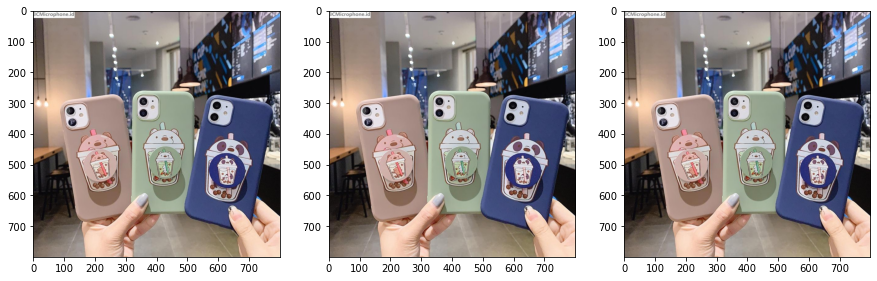

In [50]:
img_count = 0
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
axs[0].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/858b430bce57437ff3623c54c31974fd.jpg'))
axs[1].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/858b430bce57437ff3623c54c31974fd.jpg'))
axs[2].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/858b430bce57437ff3623c54c31974fd.jpg'))
plt.show()

In [51]:
highest_title_wcount = list(df.loc[df['image'] == '858b430bce57437ff3623c54c31974fd.jpg']['title'])

print(len(highest_title_wcount[0].split(' ')), len(highest_title_wcount[1].split(' ')), len(highest_title_wcount[2].split(' ')))

61 42 25


Above title analysis shows that even same product might have different length of product description (i.e.) some seller add small description or some seller add detailed description of the product.

## * label_group:

In [52]:
grouped = df.groupby(['label_group'], sort = False).count()
grouped.sort_values('image', ascending=False)[:10]

posting_id  image  image_phash  title
label_group                                       
994676122            51     51           51     51
1163569239           51     51           51     51
1141798720           51     51           51     51
159351600            51     51           51     51
562358068            51     51           51     51
3113678103           51     51           51     51
3627744656           51     51           51     51
3206118280           49     49           49     49
1733221456           46     46           46     46
1166650192           46     46           46     46

In [53]:
print(len(grouped))

11014


There are 11014 label_group are present.

#### * label_group Vs Image_Phash:

In [54]:
# Taking Top Label_group for analysis:

grouped_lbl = df.loc[df['label_group'] == 994676122].groupby(['image_phash']).count().copy()
grouped_lbl.sort_values('label_group', ascending=False, inplace=True)
grouped_lbl.head()

posting_id  image  title  label_group
image_phash                                            
f7b9c25864433966          11     11     11           11
83a82f5c7436d2d3           2      2      2            2
f7b9c25c64433926           2      2      2            2
d5780e316ed58786           2      2      2            2
ee3bc4c21b0dc4e5           2      2      2            2

In [55]:
len(grouped_lbl)

35

There are 35 different pHash are present in this label group.

Total Images are 9


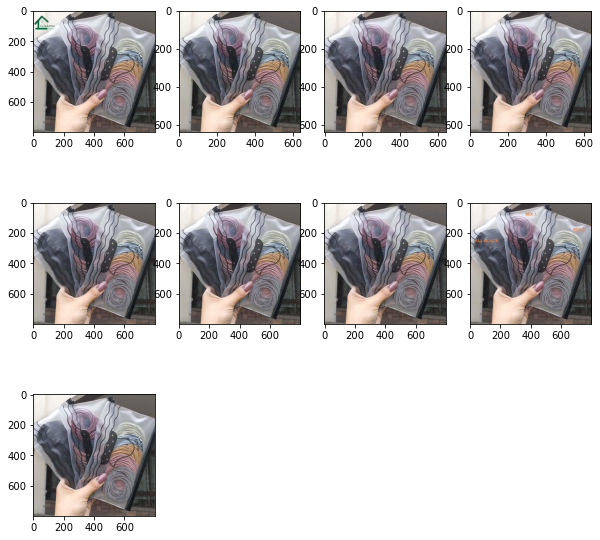

In [56]:
# Taking top image_phash for analysis

images = list(df.loc[df['image_phash'] == 'f7b9c25864433966'].groupby(['image']).count().reset_index()['image'])
print('Total Images are', len(images))

col_len = 4 
row_len = math.ceil(len(images) / 4)
img_count = 0
f, axs = plt.subplots(nrows=row_len, ncols=col_len, figsize=(10, 10))
for i in range(row_len):
    for j in range(col_len):
        if(img_count < len(images)):
            axs[i, j].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/' + images[img_count]))
            img_count+=1
        else:
            f.delaxes(axs[i][j])
plt.show()

Total Images are 2
['ea236d041f5d58cc7cd6b8f1a90df95b.jpg', 'ebf59b2cdcf50c0782b0f99dc705b9eb.jpg']


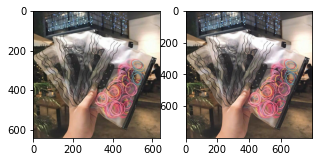

In [57]:
# Taking second highest repeated image_phash for analysis

images = list(df.loc[df['image_phash'] == '83a82f5c7436d2d3'].groupby(['image']).count().reset_index()['image'])
print('Total Images are', len(images))
print(images)

img_count = 0
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
axs[0].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/ea236d041f5d58cc7cd6b8f1a90df95b.jpg'))
axs[1].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/ebf59b2cdcf50c0782b0f99dc705b9eb.jpg'))
plt.show()

* Above analysis shows that,
    * label_group can have more than on image_phash.
    * When comparing images of two different image_phash of same label_group, products are the same but images are slightly different from each other, so different image_phash are generated.

#### * label_group Vs Image:

In [58]:
def image_printer(image_phashs):
    figsize = (5, 5)

    for im_ph in image_phashs:
        images = list(df.loc[df['image_phash'] == im_ph].groupby(['image']).count().reset_index()['image'])
        print('Total Images of Image phash', im_ph ,'are', len(images))

        length = len(images)

        if (length > 4):
            col_len = 4 
            row_len = math.ceil(len(images) / col_len)
            img_count = 0
            f1, axs1 = plt.subplots(nrows=row_len, ncols=col_len, figsize=figsize)
            for i in range(row_len):
                for j in range(col_len):
                    if(img_count < len(images)):
                        axs1[i, j].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/' + images[img_count]))
                    else:
                        f1.delaxes(axs1[i][j])
                    img_count+=1
            plt.show()
            
        elif (length > 1 and length <= 4):
            img_count = 0
            f2, axs2 = plt.subplots(nrows=1, ncols=length, figsize=figsize)
            for i in range(length):
                if(img_count < len(images)):
                    axs2[i].imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/' + images[img_count]))
                else:
                    f2.delaxes(axs2[i])
                img_count+=1
            plt.show()
            
        else:
            img_count = 0
            f3, axs3 = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
            axs3.imshow(mpimg.imread('F:/Applied AI/Assignments/31.SelfCase Study - 2/Dataset/train_images/' + images[img_count]))
            plt.show()

Total Images of Image phash f7b9c25864433966 are 9


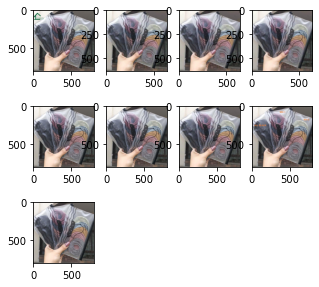

Total Images of Image phash 83a82f5c7436d2d3 are 2


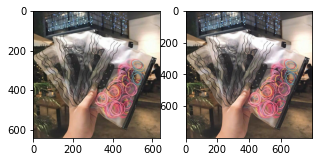

Total Images of Image phash f7b9c25c64433926 are 1


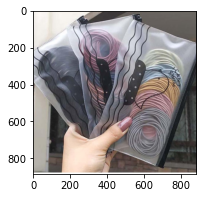

Total Images of Image phash d5780e316ed58786 are 2


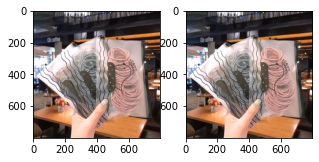

Total Images of Image phash ee3bc4c21b0dc4e5 are 2


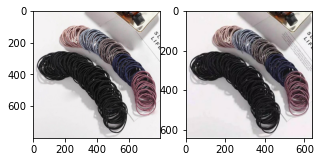

Total Images of Image phash d6aec150632f2bb1 are 2


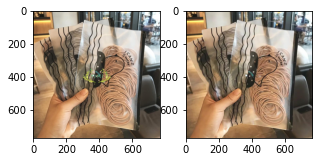

Total Images of Image phash d6aec151632f2bb0 are 2


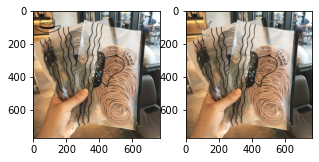

Total Images of Image phash f7b9c25c64432927 are 1


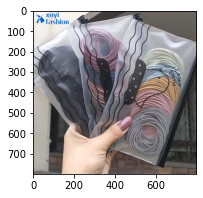

Total Images of Image phash f915c26e1e633872 are 1


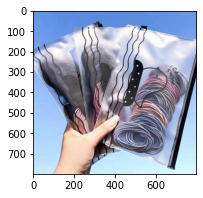

Total Images of Image phash fa5ad069c6d40c3b are 1


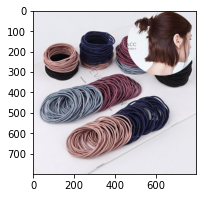

In [59]:
# Getting all the image_phash of the label_group '994676122' and printing top 10 similar images.

grouped_lbl = df.loc[df['label_group'] == 994676122].groupby(['image_phash']).count().reset_index().copy()
grouped_lbl = grouped_lbl.sort_values('image', ascending=False)[:10]
image_phashs = list(grouped_lbl['image_phash'])

image_printer(image_phashs)

Total Images of Image phash bbcb16f01ae0039f are 8


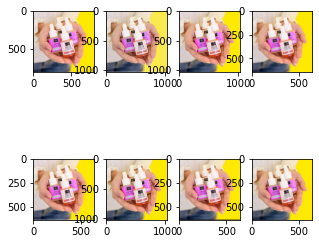

Total Images of Image phash e79c9b632452c66c are 3


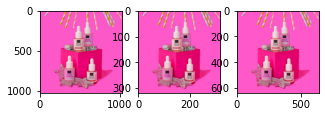

Total Images of Image phash e79c93632472c66c are 4


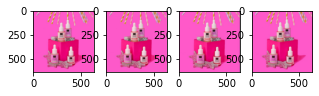

Total Images of Image phash b3cdcc328ccd3326 are 2


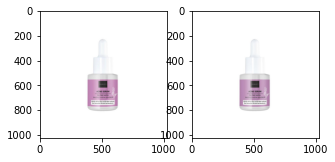

Total Images of Image phash b699d9663838cb32 are 2


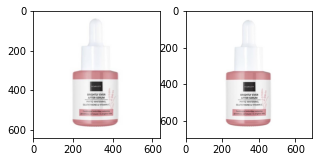

Total Images of Image phash f9565679d5c450c4 are 1


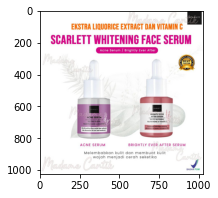

Total Images of Image phash f567e8888a1d3535 are 1


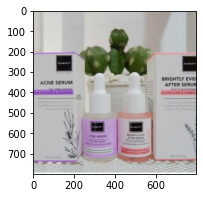

Total Images of Image phash f3067c4b91b08ee3 are 1


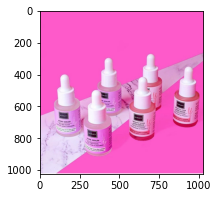

Total Images of Image phash f25ac8728d8da5a5 are 1


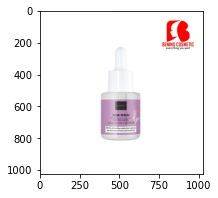

Total Images of Image phash e79c9363245ac66c are 1


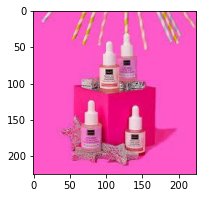

In [60]:
# Getting all the image_phash of the label_group '1163569239' and printing top 10 similar images.

grouped_lbl = df.loc[df['label_group'] == 1163569239].groupby(['image_phash']).count().reset_index().copy()
grouped_lbl = grouped_lbl.sort_values('image', ascending=False)[:10]
image_phashs = list(grouped_lbl['image_phash'])

image_printer(image_phashs)

* Above analysis shows that,
    * It is confirm, different image_phashs of same label_group have same products but images are different from each other.

### * Key Observartion from this EDA: 

1. Image name is generated using md5sum which is 128-bit hexadecimal hash value.
2. 90% of postings do not have any similar postings.
3. 0.13% of same products with same name, image_phash belongs to different label_groups.
4. Hamming distance can be used to find the distance between pHash value.
5. Similar images (i.e.) similar products more likely to have similar image_phash.
6. Similar products with slightly different images have different image_phash and belongs to different label_groups.
7. Single label_group can have more than one image_phash and they belongs to same product but can have slighlty different images.